In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as keras

In [2]:
df = pd.read_csv(r"C:\Users\bryan\Desktop\Heart_Disease_App\heart.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [3]:
#dataset courtesy of Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

In [4]:
len(df)

1025

In [19]:
y = df.target.values
X = df.drop(['target'], axis = 1)

In [20]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

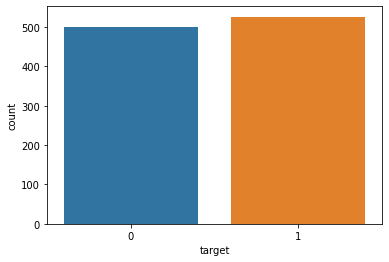

In [21]:
sns.countplot(x="target", data=df)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [24]:
#scale data for better predictions

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
#define the Dense layers and activation functions

nn = keras.Sequential()

nn.add(Dense(30, activation='relu'))

nn.add(Dropout(0.2))

nn.add(Dense(15, activation='relu'))

nn.add(Dropout(0.2))

nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=25)

nn.fit(X_train, y_train, epochs = 1000, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 686 samples, validate on 339 samples
Epoch 1/1000
686/686 [==============================] - 1s 2ms/sample - loss: 0.6862 - accuracy: 0.5773 - val_loss: 0.6127 - val_accuracy: 0.7198
Epoch 2/1000
686/686 [==============================] - 0s 95us/sample - loss: 0.6020 - accuracy: 0.6851 - val_loss: 0.5359 - val_accuracy: 0.7611
Epoch 3/1000
686/686 [==============================] - 0s 90us/sample - loss: 0.5378 - accuracy: 0.7566 - val_loss: 0.4784 - val_accuracy: 0.7906
Epoch 4/1000
686/686 [==============================] - 0s 86us/sample - loss: 0.4943 - accuracy: 0.7813 - val_loss: 0.4366 - val_accuracy: 0.8171
Epoch 5/1000
686/686 [==============================] - 0s 112us/sample - loss: 0.4460 - accuracy: 0.8120 - val_loss: 0.4055 - val_accuracy: 0.8319
Epoch 6/1000
686/686 [==============================] - 0s 106us/sample - loss: 0.4332 - accuracy: 0.8324 - val_loss: 0.3849 - val_accuracy: 0.8230
Epoch 7/1000
686/686 [==============================] - 0s 90us/sample 

In [26]:
#plot the model loss

#model_loss = pd.DataFrame(nn.history.history)
#model_loss.plot()

In [27]:
#nn.evaluate(X_test, y_test, verbose=0)

In [28]:
#nn.evaluate(X_train, y_train, verbose=0)

In [29]:
#from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
#import math

#math.sqrt(mean_squared_error(y_test,pred))

In [31]:
#mean_absolute_error(y_test, pred)

In [32]:
predictions = nn.predict_classes(X_test)

In [33]:
#test the accuracy of the network

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       156
           1       0.98      0.97      0.98       183

    accuracy                           0.97       339
   macro avg       0.97      0.97      0.97       339
weighted avg       0.97      0.97      0.97       339

[[153   3]
 [  6 177]]


In [34]:
#X_new = [[52,1,0,125,212,0,1,168,0,1.0,2,2,3]]
#X_new = scaler.transform(X_new)
#nn.predict_classes(X_new)

In [35]:
#X_new2 = [[59,1,1,140,221,0,1,164,1,0.0,2,0,2]]
#X_new2 = scaler.transform(X_new2)
#nn.predict_classes(X_new2)

In [36]:
from tensorflow.keras.models import load_model
import joblib 

In [37]:
nn.save("heart_disease_model_bry.h5")

In [38]:
np.dtype(nn)

dtype('float32')

In [39]:
joblib.dump(scaler, 'heart_scaler_bry.pkl')

['heart_scaler_bry.pkl']

In [40]:
heart_model = load_model("heart_disease_model_bry.h5")

In [41]:
heart_scaler = joblib.load("heart_scaler_bry.pkl")

In [42]:
heart_example = {"age":52,
                  "sex":1,
                 "cp":0,
                 "trestbps":125,
                 "chol":212,
                "fbs":0,
                "restecg":1,
                "thalach":168,
                "exang":0,
                "oldpeak":1.0,
                "slope":2,
                "ca":2,
                "thal":3}

In [43]:
def return_prediction(model, scaler, sample_json):
    
    age = sample_json["age"]
    sex = sample_json["sex"]
    cp = sample_json['cp']
    trestbps = sample_json['trestbps']
    chol = sample_json['chol']
    fbs = sample_json['fbs']
    restecg = sample_json['restecg']
    thalach = sample_json['thalach']
    exang = sample_json['exang']
    oldpeak = sample_json['oldpeak']
    slope = sample_json['slope']
    ca = sample_json['ca']
    thal = sample_json['thal']

                        
    
    disease = [[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]]
    
    classes = np.array(['0', '1'])
    
    disease = scaler.transform(disease)
    
    class_ind = model.predict_classes(disease)
    
    return classes[class_ind]

In [44]:
return_prediction(nn, heart_scaler, heart_example)

array([['0']], dtype='<U1')